In [1]:
from transformers import PreTrainedTokenizerFast
Q_TKN = "<usr>"
A_TKN = "<sys>"
BOS = '</s>'
EOS = '</s>'
MASK = '<unused0>'
SENT = '<unused1>'
PAD = '<pad>'

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token=BOS,
                                                    eos_token=EOS,
                                                    unk_token="<unk>",
                                                    pad_token=PAD,
                                                    mask_token=MASK,)
tokenizer.tokenize("안녕하세요. 한국어 GPT-2입니다.")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '입니다.']

https://pytorch.org/get-started/locally/
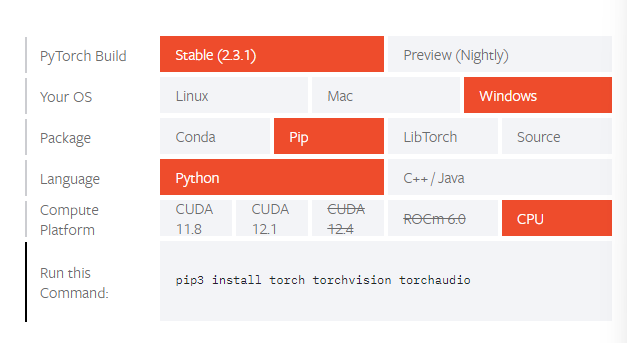

In [2]:
import torch
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')

# 응답 생성 함수
def generate_response(model, tokenizer, input_text, max_length=128):
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    output = model.generate(input_ids,
                            max_length=max_length,
                            pad_token_id=tokenizer.pad_token_id,
                            eos_token_id=tokenizer.eos_token_id,
                            bos_token_id=tokenizer.bos_token_id,
                            use_cache=True)
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

In [3]:
# 챗봇 인터페이스
def chat():
    print("챗봇과 대화를 시작하세요. '종료'를 입력하면 대화를 종료합니다.")
    while True:
        user_input = input("사용자: ")
        if user_input.lower() in ["종료", "whdfy", "exit", "quit", "bye"]:
            print("챗봇: 대화를 종료합니다.")
            break
        response = generate_response(model, tokenizer, user_input)
        print(f"챗봇: {response}")

# 챗봇 시작
chat()

챗봇과 대화를 시작하세요. '종료'를 입력하면 대화를 종료합니다.


사용자:  안녕


챗봇: 안녕을 담아주세요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


사용자:  뭐하고 있었냐?


챗봇: 뭐하고 있었냐?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"그럼, 그게 무슨 소리야?"
"


사용자:  종료다 녀석아


챗봇: 종료다 녀석아.
그런데 그게 뭔지 모르겠어.
그냥 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한 거야. 뭔가 이상한


사용자:  종료


챗봇: 대화를 종료합니다.
